# 1. Importation des librairies

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# 2. Charger les donnees

In [59]:
data = pd.read_csv('Data/LoanApprovalPrediction.csv')
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 3. EDA : Exploratory Data Analysis 

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [61]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [62]:
data['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [63]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [64]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [65]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [66]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [67]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

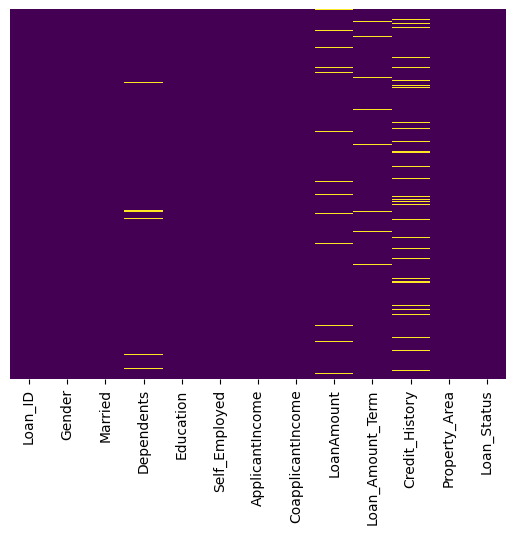

In [68]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [69]:
data.drop(columns='Loan_ID', inplace=True, axis=1)

In [70]:
print(data.shape)
data.head()

(598, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [71]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Married'] = encoder.fit_transform(data['Married'])
data['Education'] = encoder.fit_transform(data['Education'])
data['Self_Employed'] = encoder.fit_transform(data['Self_Employed'])
data['Property_Area'] = encoder.fit_transform(data['Property_Area'])
data['Loan_Status'] = encoder.fit_transform(data['Loan_Status'])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [72]:
data['Dependents'].fillna(data['Dependents'].mean(), inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mean(), inplace=True)
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 4. Division des donnees

In [73]:
print(data.shape)
X = data.iloc[ : , :-1]
y = data.iloc[ : , -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=35)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

(598, 12)
X_train: (448, 11)
X_test: (150, 11)
y_train: (448,)
y_test: (150,)


# 5. Construction des Modeles

# 5.1. Logistic Regression

Accuracy de LR: 0.8133333333333334
Precision de LR: 0.7967479674796748
Recall de LR: 0.9702970297029703
F1-Score de LR: 0.875
MSE de LR: 0.18666666666666668


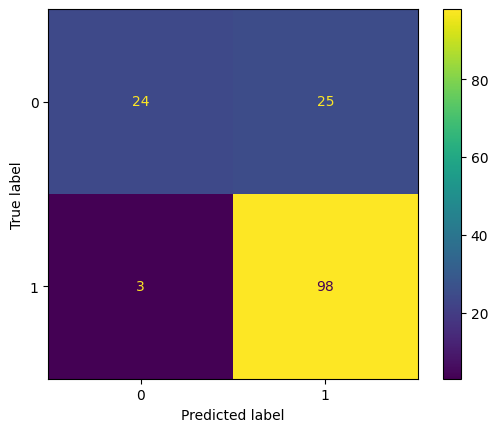

In [86]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print("Accuracy de LR:", accuracy_score(y_test, y_pred_lr))
print("Precision de LR:",precision_score(y_test, y_pred_lr))
print("Recall de LR:",recall_score(y_test, y_pred_lr))
print("F1-Score de LR:",f1_score(y_test, y_pred_lr))
print("MSE de LR:",mean_squared_error(y_test, y_pred_lr))
ConfusionMatrixDisplay.from_estimator(model_lr, X_test, y_test)

# 5.2. Support Vector Machine

Accuracy de SVM: 0.6666666666666666
Precision de SVM: 0.6711409395973155
Recall de SVM: 0.9900990099009901
F1-Score de SVM: 0.8
MSE de SVM: 0.3333333333333333


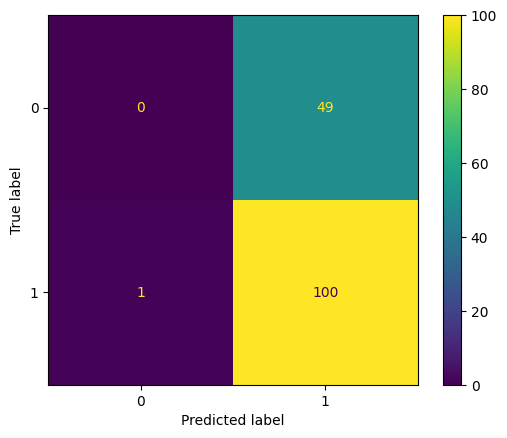

In [87]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
print("Accuracy de SVM:", accuracy_score(y_test, y_pred_svm))
print("Precision de SVM:",precision_score(y_test, y_pred_svm))
print("Recall de SVM:",recall_score(y_test, y_pred_svm))
print("F1-Score de SVM:",f1_score(y_test, y_pred_svm))
print("MSE de SVM:",mean_squared_error(y_test, y_pred_svm))
ConfusionMatrixDisplay.from_estimator(model_svm, X_test, y_test)

# 5.3. Random Forest

Accuracy de RF: 0.78
Precision de RF: 0.7982456140350878
Recall de RF: 0.900990099009901
F1-Score de RF: 0.8465116279069768
MSE de RF: 0.22


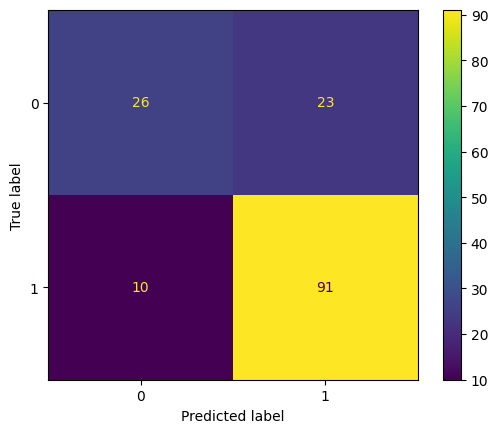

In [88]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("Accuracy de RF:", accuracy_score(y_test, y_pred_rf))
print("Precision de RF:",precision_score(y_test, y_pred_rf))
print("Recall de RF:",recall_score(y_test, y_pred_rf))
print("F1-Score de RF:",f1_score(y_test, y_pred_rf))
print("MSE de RF:",mean_squared_error(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test)

# 5.4. Decision tree

Accuracy de DT: 0.7466666666666667
Precision de DT: 0.794392523364486
Recall de DT: 0.8415841584158416
F1-Score de DT: 0.8173076923076923
MSE de DT: 0.25333333333333335


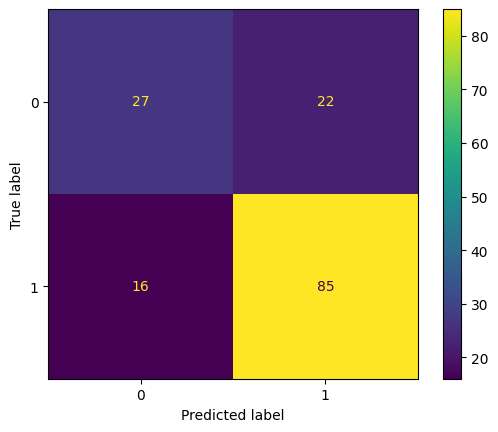

In [91]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print("Accuracy de DT:", accuracy_score(y_test, y_pred_dt))
print("Precision de DT:",precision_score(y_test, y_pred_dt))
print("Recall de DT:",recall_score(y_test, y_pred_dt))
print("F1-Score de DT:",f1_score(y_test, y_pred_dt))
print("MSE de DT:",mean_squared_error(y_test, y_pred_dt))
ConfusionMatrixDisplay.from_estimator(model_dt, X_test, y_test)

# 5.5. KNeighbors Classifier

Accuracy de KN: 0.68
Precision de KN: 0.712
Recall de KN: 0.8811881188118812
F1-Score de KN: 0.7876106194690266
MSE de KN: 0.32


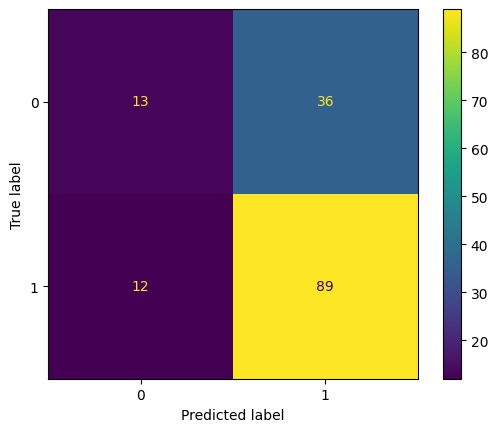

In [92]:
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)
y_pred_kn = model_kn.predict(X_test)
print("Accuracy de KN:", accuracy_score(y_test, y_pred_kn))
print("Precision de KN:",precision_score(y_test, y_pred_kn))
print("Recall de KN:",recall_score(y_test, y_pred_kn))
print("F1-Score de KN:",f1_score(y_test, y_pred_kn))
print("MSE de KN:",mean_squared_error(y_test, y_pred_kn))
ConfusionMatrixDisplay.from_estimator(model_kn, X_test, y_test)

# 6. Prediction

In [89]:
data.head(4)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,144.968804,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1


In [84]:
print(model_lr.predict([[1,	1,	0.0,	1,	0,	2583,	2358.0,	120.000000,	360.0,	1.0,	2	]]))

[1]
